In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
#np.set_printoptions(threshold=np.nan)
pd.options.display.max_columns = None

EXPLORE MERGED AND COMBINED DATASET

In [61]:
superframe=pd.read_csv('C:/Users/jpano/Documents/DACourse/CSDA1050/Capstone/Datasets/superframe.csv')

FileNotFoundError: File b'C:/Users/jpano/Documents/DACourse/CSDA1050/Capstone/Datasets/superframe.csv' does not exist

In [ ]:
superframe.shape

In [ ]:
superframe.nunique()

In [ ]:
superframe.head()

In [ ]:
#Target variable
freq_table_1 = pd.Series(superframe['good']).value_counts()
print(freq_table_1)
freq_table_1/freq_table_1.sum()

In [ ]:
superframe.isnull().sum()

In [ ]:
superframe.dtypes

EXPLORE NUMERIC ATTRIBUTES

In [ ]:
num_cols = superframe[['total_30_day_fill_count','total_claim_count','total_day_supply','total_drug_cost']]
num_cols.describe()

In [ ]:
#box plots
import seaborn as sns
fig = plt.figure(figsize=(10,10))
sns.boxplot(data=num_cols)


In [ ]:
#histograms
num_cols.hist()
#not normal distributions & presence of outliers

In [ ]:
corr = num_cols.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

EXPLORE CATEGORICAL VARIABLES

In [ ]:
#filter into 2 separate dfs for good and bad in order to compare visualizations between the groups
goodtotal=superframe[superframe['good']==1] #not on excluded list
badtotal=superframe[superframe['good']==0] #on excluded list

In [ ]:
#Next we look at specialty_description w.r.t. our Target Variable "good"
crosstab1=pd.crosstab(superframe.specialty_description, superframe.good, margins=True, normalize='index')

In [ ]:
plt.figure()
crosstab1.plot.bar(stacked=True);  #too hard to read with all specialties shown - how to show only top 10????

COUNT OF SPECIALTY

In [ ]:
freq_table_1a = pd.Series(badtotal['specialty_description']).value_counts()
freq_table_1a.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('Specialty Description per Medicare Part D Prescriptions')
plt.ylabel('Count')
plt.title('Specialities Associated with Excluded Practitioners')

In [ ]:
freq_table_1b = pd.Series(badtotal['SPECIALTY']).value_counts()
freq_table_1b.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('Specialty per LEIE')
plt.ylabel('Count of Prescriptions')
plt.title('Specialities Associated with Excluded Practitioners')

In [ ]:
freq_table_1c = pd.Series(goodtotal['specialty_description']).value_counts()
freq_table_1c.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('Specialty Description per Medicare Part D Prescriptions')
plt.ylabel('Count')
plt.title('Specialities Associated with Non-Excluded Practitioners')

In [ ]:
freq_table_2a = pd.Series(badtotal['STATE']).value_counts()
freq_table_2a.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Count of Prescriptions')
plt.title('States Associated with Excluded Practitioners')
#most in Florida

In [ ]:
freq_table_2b = pd.Series(goodtotal['nppes_provider_state']).value_counts()
freq_table_2b.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Count of Prescriptions')
plt.title('States Associated with Non-Excluded Practitioners')
#most in California

In [ ]:
badtotal["first_last"]=badtotal["FIRSTNAME"]+badtotal["LASTNAME"]

In [ ]:
goodtotal["first_last"]=goodtotal["nppes_provider_first_name"]+goodtotal["nppes_provider_last_org_name"]

In [ ]:
freq_table_3a = pd.Series(badtotal['first_last']).value_counts()
freq_table_3a.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('Practitioner')
plt.ylabel('Count of Prescriptions')
plt.title('Excluded Practitioners')

In [ ]:
freq_table_3b = pd.Series(goodtotal['first_last']).value_counts()
freq_table_3b.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('Practitioner')
plt.ylabel('Count of Prescriptions')
plt.title('Non-Excluded Practitioners')

In [ ]:
freq_table_4a = pd.Series(badtotal['drug_name']).value_counts()
freq_table_4a.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('Drug')
plt.ylabel('Count of Prescriptions')
plt.title('Prescribed Drugs of Excluded Practitioners')

In [ ]:
freq_table_4b = pd.Series(goodtotal['drug_name']).value_counts()
freq_table_4b.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('Drug')
plt.ylabel('Count of Prescriptions')
plt.title('Prescribed Drugs of Non-Excluded Practitioners')

In [ ]:
freq_table_5a = pd.Series(badtotal['ActiveIngredient']).value_counts()
freq_table_5a.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('Active Ingredient')
plt.ylabel('Count of Prescriptions')
plt.title('Active Ingredient in Drugs Prescribed by Excluded Practitioners')

In [ ]:
import statsmodels.graphics.mosaicplot as mp
fig = plt.figure(figsize=(30,6))
ax = fig.add_subplot(111)
mp.mosaic(freq_table_5a.sort_values(ascending=False)[:5], ax=ax);

In [ ]:
freq_table_5b = pd.Series(goodtotal['ActiveIngredient']).value_counts()
freq_table_5b.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('Active Ingredient')
plt.ylabel('Count of Prescriptions')
plt.title('Active Ingredient in Drugs Prescribed by Non-Excluded Practitioners')

In [ ]:
crosstab_1 = pd.crosstab(superframe.infoYear, superframe.good, margins=True, normalize='index')
crosstab_1.plot.bar()

EXPLORE THE COLLAPSED DATASET

In [7]:
df_new=pd.read_csv("/Users/ed/Google Drive/CSDA_1050/data/df_newOpFlag.csv")

In [8]:
df_new.shape

(75220, 26)

In [9]:
freq_table = pd.Series(df_new['good']).value_counts()
print(freq_table)
freq_table/freq_table.sum()

1    54526
0    20694
Name: good, dtype: int64


1    0.724887
0    0.275113
Name: good, dtype: float64

In [10]:
num_cols2 = df_new[['total_30_day_fill_count','total_claim_count','total_day_supply','total_drug_cost']]
num_cols2.describe()

,total_30_day_fill_count,total_claim_count,total_day_supply,total_drug_cost
count,75220.000000,75220.000000,75220.000000,7.522000e+04
mean,102.359658,78.611779,2847.879673,6.222307e+03
std,265.766974,228.879225,7496.371076,4.623743e+04
min,11.000000,11.000000,9.000000,1.200000e-01
25%,19.000000,16.000000,470.000000,2.968375e+02
50%,38.000000,29.000000,1020.000000,8.685000e+02
75%,90.000000,68.000000,2502.000000,3.201360e+03
max,15757.600000,15745.000000,434728.000000,4.664741e+06


MISSING VALUES

In [11]:
df_new.isnull().sum()

Unnamed: 0                          0
Unnamed: 0.1                        0
npi                                 0
generic_name                        0
ActiveIngredient                69576
DOB                             54526
EXCLDATE                        54526
EXCLTYPE                        54526
GENERAL                         54526
ZIP                             54526
description_flag                    0
drug_name                           0
good                                0
infoYear                            0
nppes_provider_city                 0
nppes_provider_first_name           0
nppes_provider_last_org_name        0
nppes_provider_state                0
specialty_description               0
total_30_day_fill_count             0
total_claim_count                   0
total_day_supply                    0
total_drug_cost                     0
flag1                               0
flag2                               0
flag                                0
dtype: int64

In [12]:
!pip install missingno

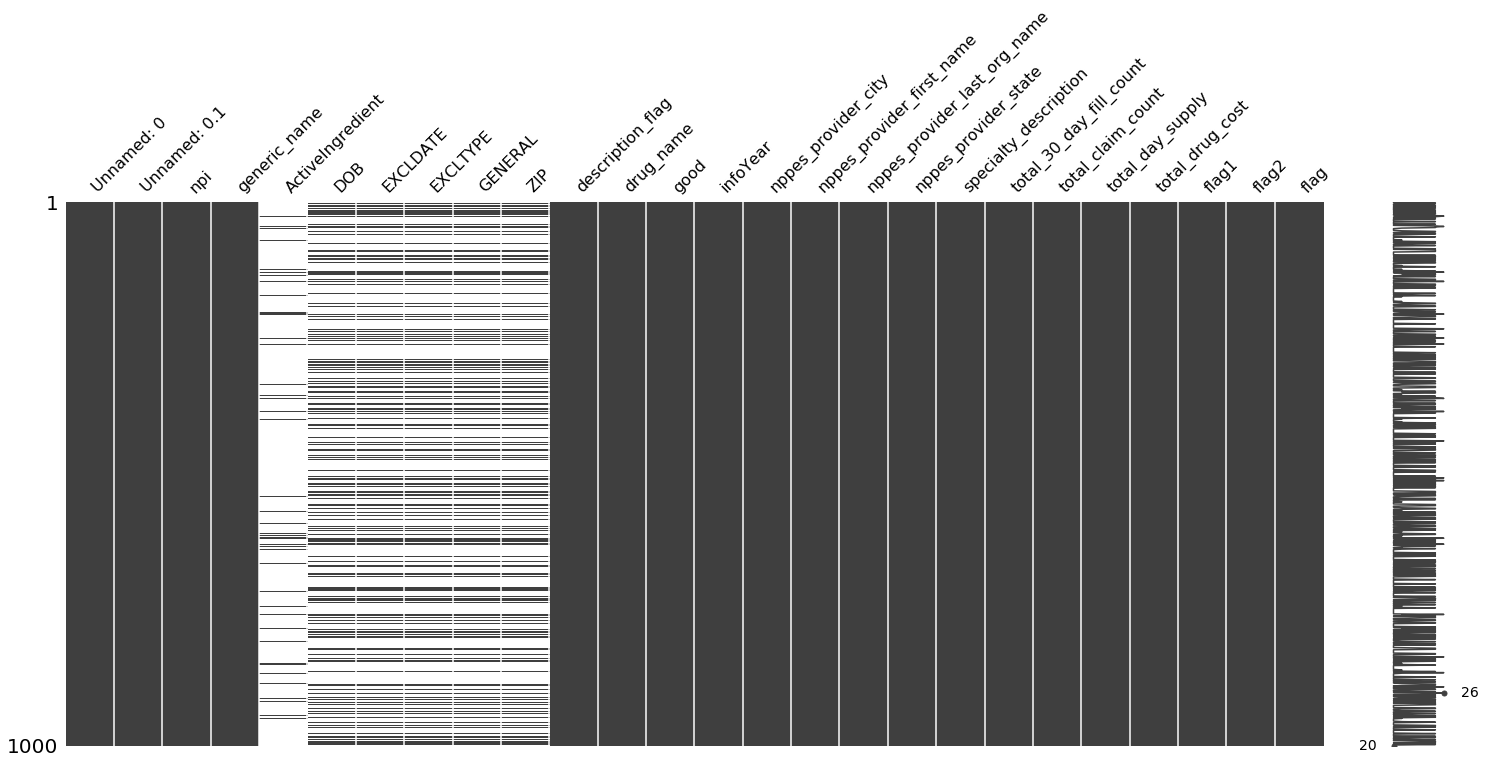

In [13]:
import missingno as msno
msno.matrix(df_new.sample(1000))

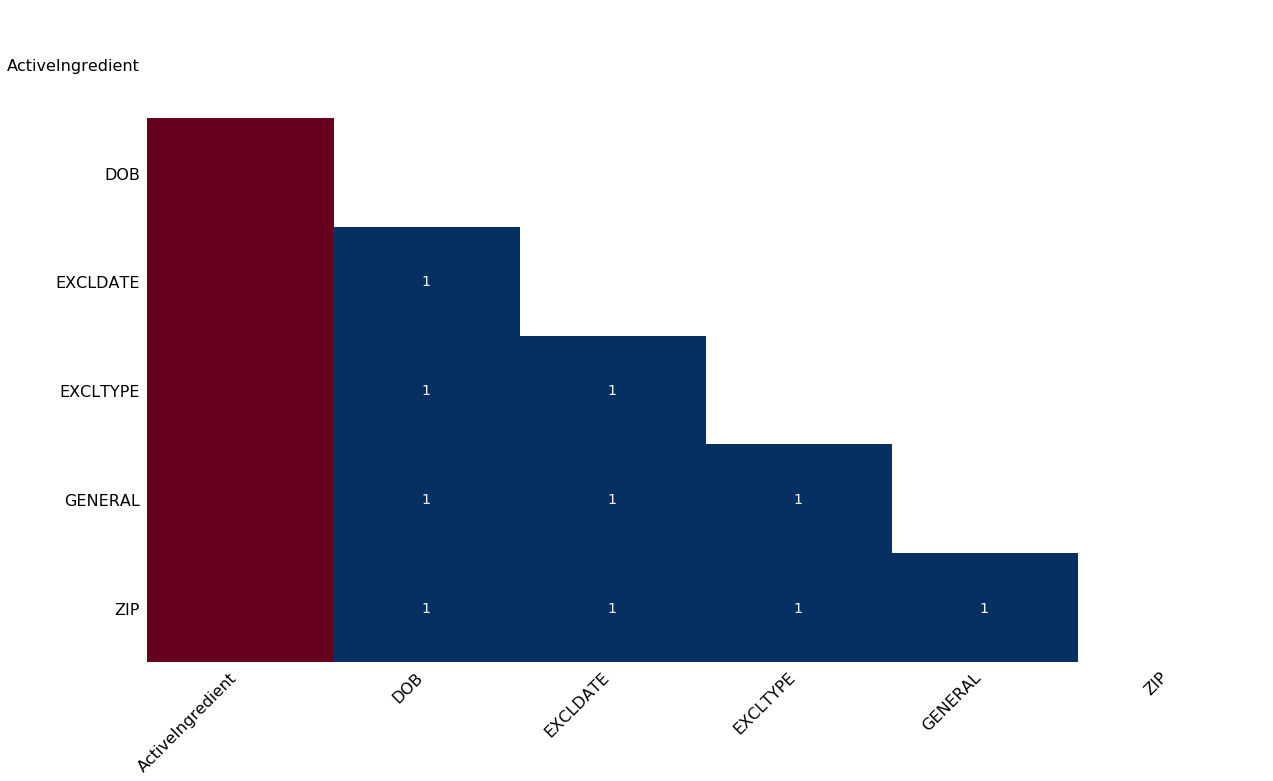

In [14]:
msno.heatmap(df_new)

In [15]:
df_new1=df_new#.dropna(subset=['key'])

In [16]:
df_new1.shape

(75220, 26)

In [17]:
df_new1['REINDATE'].isnull().sum()

KeyError: 'REINDATE'

In [ ]:
(df_new1['REINDATE'] == 0).sum(axis=0)

In [ ]:
df_new1['WAIVERDATE'].isnull().sum()

In [ ]:
(df_new1['WAIVERDATE'] == 0).sum(axis=0)

In [ ]:
df_new1['WVRSTATE'].isnull().sum()

### drop other variables

In [20]:
df_new2=df_new1.drop(['DOB','EXCLDATE','EXCLTYPE','GENERAL','ZIP','description_flag'],axis='columns')

In [21]:
df_new2.shape

(75220, 20)

In [22]:
#check what is still missing
df_new2.isnull().sum()

Unnamed: 0                          0
Unnamed: 0.1                        0
npi                                 0
generic_name                        0
ActiveIngredient                69576
drug_name                           0
good                                0
infoYear                            0
nppes_provider_city                 0
nppes_provider_first_name           0
nppes_provider_last_org_name        0
nppes_provider_state                0
specialty_description               0
total_30_day_fill_count             0
total_claim_count                   0
total_day_supply                    0
total_drug_cost                     0
flag1                               0
flag2                               0
flag                                0
dtype: int64

In [23]:
df_new2.nunique()

Unnamed: 0                      75220
Unnamed: 0.1                    75220
npi                              2412
generic_name                     1025
ActiveIngredient                  193
drug_name                        1414
good                                2
infoYear                            4
nppes_provider_city              1157
nppes_provider_first_name        1065
nppes_provider_last_org_name     1955
nppes_provider_state               53
specialty_description              89
total_30_day_fill_count          5319
total_claim_count                1337
total_day_supply                10646
total_drug_cost                 65886
flag1                               2
flag2                               2
flag                                2
dtype: int64

In [24]:
num_cols2 = df_new2[['total_30_day_fill_count','total_claim_count','total_day_supply','total_drug_cost']]
num_cols2.describe()

,total_30_day_fill_count,total_claim_count,total_day_supply,total_drug_cost
count,75220.000000,75220.000000,75220.000000,7.522000e+04
mean,102.359658,78.611779,2847.879673,6.222307e+03
std,265.766974,228.879225,7496.371076,4.623743e+04
min,11.000000,11.000000,9.000000,1.200000e-01
25%,19.000000,16.000000,470.000000,2.968375e+02
50%,38.000000,29.000000,1020.000000,8.685000e+02
75%,90.000000,68.000000,2502.000000,3.201360e+03
max,15757.600000,15745.000000,434728.000000,4.664741e+06


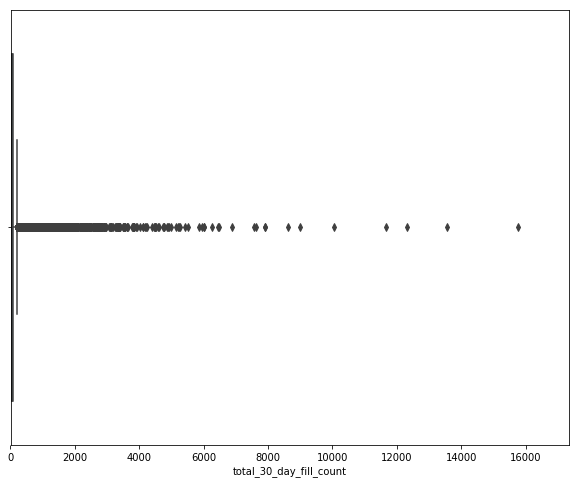

In [25]:
i = 'total_30_day_fill_count'
df=df_new2
plt.figure(figsize=(10,8))
plt.xlim(df[i].min(), df[i].max()*1.1)
sns.boxplot(x=df[i])

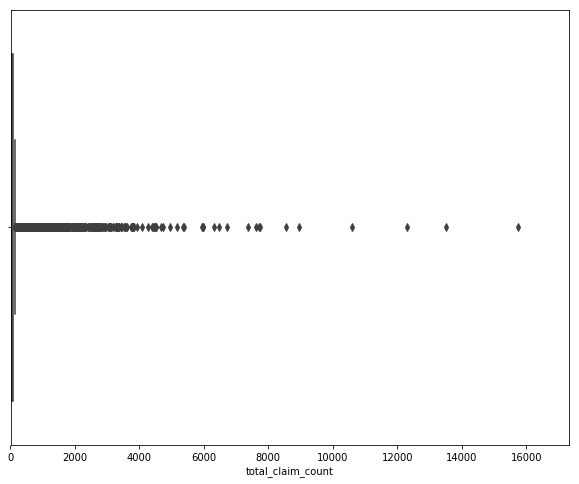

In [26]:
j = 'total_claim_count'
df=df_new2
plt.figure(figsize=(10,8))
plt.xlim(df[j].min(), df[j].max()*1.1)
sns.boxplot(x=df[j])

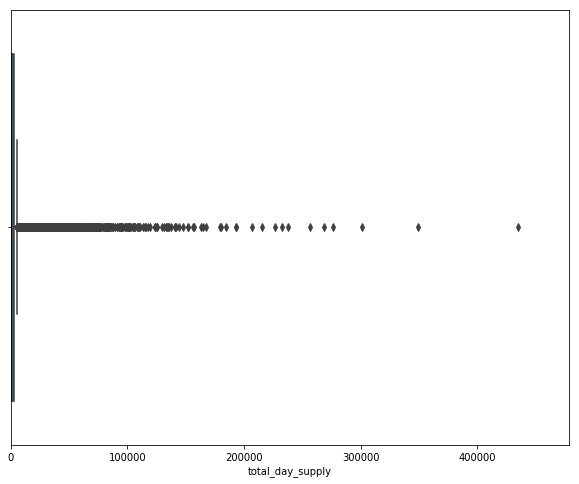

In [27]:
k = 'total_day_supply'
df=df_new2
plt.figure(figsize=(10,8))
plt.xlim(df[k].min(), df[k].max()*1.1)
sns.boxplot(x=df[k])

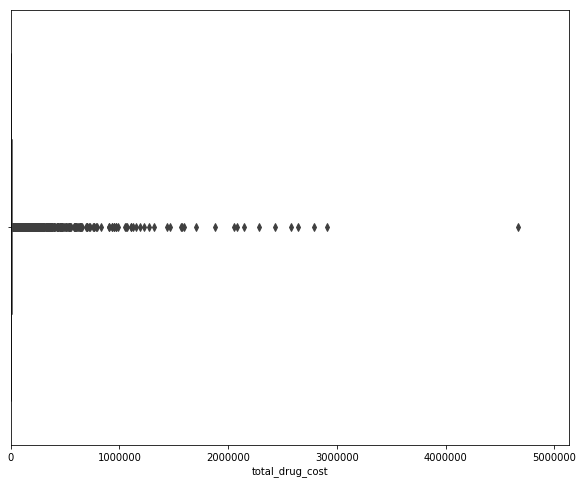

In [28]:
l = 'total_drug_cost'
df=df_new2
plt.figure(figsize=(10,8))
plt.xlim(df[l].min(), df[l].max()*1.1)
sns.boxplot(x=df[l])

In [29]:
df_new2.dtypes

Unnamed: 0                        int64
Unnamed: 0.1                      int64
npi                               int64
generic_name                     object
ActiveIngredient                 object
drug_name                        object
good                              int64
infoYear                          int64
nppes_provider_city              object
nppes_provider_first_name        object
nppes_provider_last_org_name     object
nppes_provider_state             object
specialty_description            object
total_30_day_fill_count         float64
total_claim_count                 int64
total_day_supply                  int64
total_drug_cost                 float64
flag1                              bool
flag2                              bool
flag                              int64
dtype: object

In [30]:
# convert to correct data types
#df_new2['DOB']=pd.to_datetime(df_new2['DOB'].astype(str),format='%Y%m%d')
#df_new2['EXCLDATE']=pd.to_datetime(df_new2['EXCLDATE'].astype(str),format='%Y%m%d')

In [31]:
#check conversion is correct
#(df_new2['EXCLDATE'].tail())
#(df_new2['DOB'].tail())

In [32]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75220 entries, 0 to 75219
Data columns (total 20 columns):
Unnamed: 0                      75220 non-null int64
Unnamed: 0.1                    75220 non-null int64
npi                             75220 non-null int64
generic_name                    75220 non-null object
ActiveIngredient                5644 non-null object
drug_name                       75220 non-null object
good                            75220 non-null int64
infoYear                        75220 non-null int64
nppes_provider_city             75220 non-null object
nppes_provider_first_name       75220 non-null object
nppes_provider_last_org_name    75220 non-null object
nppes_provider_state            75220 non-null object
specialty_description           75220 non-null object
total_30_day_fill_count         75220 non-null float64
total_claim_count               75220 non-null int64
total_day_supply                75220 non-null int64
total_drug_cost                 75

In [33]:
df_new2.nunique()

Unnamed: 0                      75220
Unnamed: 0.1                    75220
npi                              2412
generic_name                     1025
ActiveIngredient                  193
drug_name                        1414
good                                2
infoYear                            4
nppes_provider_city              1157
nppes_provider_first_name        1065
nppes_provider_last_org_name     1955
nppes_provider_state               53
specialty_description              89
total_30_day_fill_count          5319
total_claim_count                1337
total_day_supply                10646
total_drug_cost                 65886
flag1                               2
flag2                               2
flag                                2
dtype: int64

In [34]:
df_new2.head()

,Unnamed: 0,Unnamed: 0.1,npi,generic_name,ActiveIngredient,drug_name,good,infoYear,nppes_provider_city,nppes_provider_first_name,nppes_provider_last_org_name,nppes_provider_state,specialty_description,total_30_day_fill_count,total_claim_count,total_day_supply,total_drug_cost,flag1,flag2,flag
0,0,0,1003001868,AMOXICILLIN,NaN,AMOXICILLIN,1,13,HARRISBURG,PAMELA,LINKER,NC,Dentist,34.0,34,125,127.86,False,False,0
1,1,6,1003076159,AZITHROMYCIN,NaN,AZITHROMYCIN,1,13,BROOMFIELD,EVELYN,BOLT,CO,Internal Medicine,12.0,12,221,174.80,False,False,0
2,2,7,1003076159,FLUTICASONE PROPIONATE,NaN,FLUTICASONE PROPIONATE,1,13,BROOMFIELD,EVELYN,BOLT,CO,Internal Medicine,18.0,14,534,350.84,False,False,0
3,3,8,1003076159,FLUTICASONE/SALMETEROL,NaN,ADVAIR DISKUS,1,13,BROOMFIELD,EVELYN,BOLT,CO,Internal Medicine,18.0,13,540,5442.04,False,False,0
4,4,9,1003076159,PREDNISONE,NaN,PREDNISONE,1,13,BROOMFIELD,EVELYN,BOLT,CO,Internal Medicine,12.4,12,157,61.51,False,False,0


In [35]:
#check proportion of good and bad in the resulting data

freq_table_2 = pd.Series(df_new2['good']).value_counts()
print(freq_table_2)
freq_table_2/freq_table_2.sum()

1    54526
0    20694
Name: good, dtype: int64


1    0.724887
0    0.275113
Name: good, dtype: float64

In [36]:
df_new2.to_csv('df_new2.csv')

### ENCODING

In [37]:
encoded_df=df_new2

In [38]:
encoded_df.head(2)

,Unnamed: 0,Unnamed: 0.1,npi,generic_name,ActiveIngredient,drug_name,good,infoYear,nppes_provider_city,nppes_provider_first_name,nppes_provider_last_org_name,nppes_provider_state,specialty_description,total_30_day_fill_count,total_claim_count,total_day_supply,total_drug_cost,flag1,flag2,flag
0,0,0,1003001868,AMOXICILLIN,NaN,AMOXICILLIN,1,13,HARRISBURG,PAMELA,LINKER,NC,Dentist,34.0,34,125,127.86,False,False,0
1,1,6,1003076159,AZITHROMYCIN,NaN,AZITHROMYCIN,1,13,BROOMFIELD,EVELYN,BOLT,CO,Internal Medicine,12.0,12,221,174.80,False,False,0


In [39]:
encoded_df.isnull().sum()

Unnamed: 0                          0
Unnamed: 0.1                        0
npi                                 0
generic_name                        0
ActiveIngredient                69576
drug_name                           0
good                                0
infoYear                            0
nppes_provider_city                 0
nppes_provider_first_name           0
nppes_provider_last_org_name        0
nppes_provider_state                0
specialty_description               0
total_30_day_fill_count             0
total_claim_count                   0
total_day_supply                    0
total_drug_cost                     0
flag1                               0
flag2                               0
flag                                0
dtype: int64

In [40]:
#fill missing values with zeros 
#encoded_df['ActiveIngredient']=encoded_df["ActiveIngredient"].fillna("0")
#encoded_df['DOB']=encoded_df["DOB"].fillna("0")
#encoded_df["EXCLDATE"]=encoded_df["EXCLDATE"].fillna("0")
#encoded_df["EXCLTYPE"]=encoded_df["EXCLTYPE"].fillna("0")
#encoded_df["GENERAL"]=encoded_df["GENERAL"].fillna("0")
#encoded_df["ZIP"]=encoded_df["ZIP"].fillna("0")

In [41]:
#encoded_df.to_csv('encoded_df.csv')

In [42]:
encoded_df.dtypes #many objects - need to convert

Unnamed: 0                        int64
Unnamed: 0.1                      int64
npi                               int64
generic_name                     object
ActiveIngredient                 object
drug_name                        object
good                              int64
infoYear                          int64
nppes_provider_city              object
nppes_provider_first_name        object
nppes_provider_last_org_name     object
nppes_provider_state             object
specialty_description            object
total_30_day_fill_count         float64
total_claim_count                 int64
total_day_supply                  int64
total_drug_cost                 float64
flag1                              bool
flag2                              bool
flag                              int64
dtype: object

In [44]:
encoded_df[encoded_df["nppes_provider_cityX"]>959]

KeyError: 'nppes_provider_cityX'

In [519]:
cat_cols = encoded_df.select_dtypes(['object'])
cat_cols.columns

Index(['generic_name', 'ActiveIngredient', 'drug_name', 'nppes_provider_city',
       'nppes_provider_first_name', 'nppes_provider_last_org_name',
       'nppes_provider_state', 'specialty_description'],
      dtype='object')

In [508]:
#factorize the categorical vars
label_mapping = {}

for c in cat_cols:
    encoded_df[c+"X"], label_mapping[c+"X"] = pd.factorize(encoded_df[c])

In [509]:
print (label_mapping)

{'generic_nameX': Index(['AMOXICILLIN', 'AZITHROMYCIN', 'FLUTICASONE PROPIONATE',
       'FLUTICASONE/SALMETEROL', 'PREDNISONE', 'DOXYCYCLINE HYCLATE',
       'DIAZEPAM', 'GABAPENTIN', 'HYDROCODONE/ACETAMINOPHEN',
       'METHYLPREDNISOLONE',
       ...
       'TOLVAPTAN', 'ERYTHROMYCIN BASE/ETHANOL', 'AMIKACIN SULFATE',
       'DALTEPARIN SODIUM,PORCINE', 'VANCOMYCIN HCL/D5W', 'ALOSETRON HCL',
       'TOLAZAMIDE', 'NALBUPHINE HCL', 'PNV WITH CA,NO.71/IRON/FA',
       'PNV119/IRON FUMARATE/FA/DSS'],
      dtype='object', length=1025), 'ActiveIngredientX': Index(['INSULIN GLARGINE RECOMBINANT', 'ALBUTEROL SULFATE', 'EZETIMIBE',
       'INSULIN ASPART RECOMBINANT', 'TIOTROPIUM BROMIDE', 'LIDOCAINE',
       'LEVOFLOXACIN; SODIUM CHLORIDE', 'POTASSIUM CHLORIDE',
       'AZATHIOPRINE SODIUM', 'LEDIPASVIR; SOFOSBUVIR',
       ...
       'PENICILLAMINE', 'NIACIN', 'BROMOCRIPTINE MESYLATE', 'INFLIXIMAB',
       'TROSPIUM CHLORIDE', 'NALTREXONE', 'CALCIUM ACETATE',
       'ETHINYL ESTRADIOL; LE

In [510]:
label_mapping.shape

AttributeError: 'dict' object has no attribute 'shape'

In [511]:
encoded_df[encoded_df["nppes_provider_cityX"]>959]

,Unnamed: 0,Unnamed: 0.1,npi,generic_name,ActiveIngredient,drug_name,good,infoYear,nppes_provider_city,nppes_provider_first_name,nppes_provider_last_org_name,nppes_provider_state,specialty_description,total_30_day_fill_count,total_claim_count,total_day_supply,total_drug_cost,flag1,flag2,flag,generic_nameX,ActiveIngredientX,drug_nameX,nppes_provider_cityX,nppes_provider_first_nameX,nppes_provider_last_org_nameX,nppes_provider_stateX,specialty_descriptionX
56345,56345,58514,1750486296,ESTRADIOL,NaN,ESTRADIOL,1,13,SAINT CLOUD,MICHAEL,EIGHAN,MN,Obstetrics/Gynecology,32.9,21,988,194.67,False,False,0,90,-1,95,960,25,1544,35,14
56346,56346,58515,1750486296,SOLIFENACIN SUCCINATE,NaN,VESICARE,1,13,SAINT CLOUD,MICHAEL,EIGHAN,MN,Obstetrics/Gynecology,19.0,15,570,3898.94,False,False,0,313,-1,337,960,25,1544,35,14
56380,56380,58549,1750580148,ALBUTEROL SULFATE,ALBUTEROL SULFATE,VENTOLIN HFA,0,15,FISHKILL,JEANINE,SANTIAGO,NY,Family Practice,14.1,14,354,704.72,False,False,0,24,1,631,961,225,1548,15,15
56381,56381,58550,1750580148,ALPRAZOLAM,NaN,ALPRAZOLAM,0,13,FISHKILL,JEANINE,SANTIAGO,NY,Family Practice,44.0,44,1293,444.42,False,False,0,74,-1,76,961,225,1548,15,15
56382,56382,58551,1750580148,AMLODIPINE BESYLATE,NaN,AMLODIPINE BESYLATE,0,15,FISHKILL,JEANINE,SANTIAGO,NY,Family Practice,67.0,49,2010,284.16,False,False,0,27,-1,27,961,225,1548,15,15
56383,56383,58552,1750580148,ATORVASTATIN CALCIUM,NaN,ATORVASTATIN CALCIUM,0,13,FISHKILL,JEANINE,SANTIAGO,NY,Family Practice,42.0,28,1260,547.70,False,False,0,29,-1,29,961,225,1548,15,15
56384,56384,58553,1750580148,CARBIDOPA/LEVODOPA,NaN,CARBIDOPA-LEVODOPA,0,15,FISHKILL,JEANINE,SANTIAGO,NY,Family Practice,15.0,15,450,311.41,False,False,0,157,-1,161,961,225,1548,15,15
56385,56385,58554,1750580148,CIPROFLOXACIN HCL,NaN,CIPROFLOXACIN HCL,0,13,FISHKILL,JEANINE,SANTIAGO,NY,Family Practice,22.0,22,259,379.46,False,False,0,12,-1,12,961,225,1548,15,15
56386,56386,58555,1750580148,CITALOPRAM HYDROBROMIDE,NaN,CITALOPRAM HBR,0,15,FISHKILL,JEANINE,SANTIAGO,NY,Family Practice,20.0,12,600,58.56,False,False,0,32,-1,32,961,225,1548,15,15
56387,56387,58556,1750580148,CLONAZEPAM,NaN,CLONAZEPAM,0,15,FISHKILL,JEANINE,SANTIAGO,NY,Family Practice,13.0,13,375,62.74,False,False,0,163,-1,167,961,225,1548,15,15


In [512]:
print (encoded_df.dtypes)
print (encoded_df.nunique())

Unnamed: 0                         int64
Unnamed: 0.1                       int64
npi                                int64
generic_name                      object
ActiveIngredient                  object
drug_name                         object
good                               int64
infoYear                           int64
nppes_provider_city               object
nppes_provider_first_name         object
nppes_provider_last_org_name      object
nppes_provider_state              object
specialty_description             object
total_30_day_fill_count          float64
total_claim_count                  int64
total_day_supply                   int64
total_drug_cost                  float64
flag1                               bool
flag2                               bool
flag                               int64
generic_nameX                      int64
ActiveIngredientX                  int64
drug_nameX                         int64
nppes_provider_cityX               int64
nppes_provider_f

In [513]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(df_new2,alpha=0.2,figsize=(12,12),diagonal='kde')

## MODELLING

In [514]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn import cross_validation
from sklearn.cross_validation import KFold

In [515]:
encoded_df.shape

(75220, 28)

### DECISION TREE USING ALL VARS AND NO LOG TRANSFORM ON NUMERIC

In [516]:
inputvar=encoded_df.drop(['good','npi'], axis=1)
inputvar.head()

,Unnamed: 0,Unnamed: 0.1,generic_name,ActiveIngredient,drug_name,infoYear,nppes_provider_city,nppes_provider_first_name,nppes_provider_last_org_name,nppes_provider_state,specialty_description,total_30_day_fill_count,total_claim_count,total_day_supply,total_drug_cost,flag1,flag2,flag,generic_nameX,ActiveIngredientX,drug_nameX,nppes_provider_cityX,nppes_provider_first_nameX,nppes_provider_last_org_nameX,nppes_provider_stateX,specialty_descriptionX
0,0,0,AMOXICILLIN,NaN,AMOXICILLIN,13,HARRISBURG,PAMELA,LINKER,NC,Dentist,34.0,34,125,127.86,False,False,0,0,-1,0,0,0,0,0,0
1,1,6,AZITHROMYCIN,NaN,AZITHROMYCIN,13,BROOMFIELD,EVELYN,BOLT,CO,Internal Medicine,12.0,12,221,174.80,False,False,0,1,-1,1,1,1,1,1,1
2,2,7,FLUTICASONE PROPIONATE,NaN,FLUTICASONE PROPIONATE,13,BROOMFIELD,EVELYN,BOLT,CO,Internal Medicine,18.0,14,534,350.84,False,False,0,2,-1,2,1,1,1,1,1
3,3,8,FLUTICASONE/SALMETEROL,NaN,ADVAIR DISKUS,13,BROOMFIELD,EVELYN,BOLT,CO,Internal Medicine,18.0,13,540,5442.04,False,False,0,3,-1,3,1,1,1,1,1
4,4,9,PREDNISONE,NaN,PREDNISONE,13,BROOMFIELD,EVELYN,BOLT,CO,Internal Medicine,12.4,12,157,61.51,False,False,0,4,-1,4,1,1,1,1,1


In [517]:
encoded_df['good']=encoded_df['good']-1


In [288]:
encoded_df['good']=encoded_df['good']*-1

In [289]:
targetvar=encoded_df['good']
targetvar.head()

0    0
1    0
2    0
3    0
4    0
Name: good, dtype: int64

In [290]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(inputvar, targetvar, test_size=0.3)

In [291]:
from sklearn import tree

In [292]:
X_train.head

<bound method NDFrame.head of        Unnamed: 0  Unnamed: 0.1  generic_name  ActiveIngredient  drug_name  \
34903       34903         36118           314                -1         70   
22735       22735         23572           141                -1        145   
33657       33657         34823           201                -1        209   
41672       41672         43268           235                -1        246   
30257       30257         31348            74                -1         76   
64739       64739         67475           185                15        192   
61095       61095         63474            60                 7        398   
16912       16912         17635           140                -1        143   
49580       49580         51427            38                -1         38   
19031       19031         19809           279                -1        860   
23507       23507         24361            95                -1         98   
44861       44861         46540   

In [293]:
freq_table_ytrain = pd.Series(y_train).value_counts()
print(freq_table_ytrain)
#training set has more than 2x as many good as bad

0    38150
1    14504
Name: good, dtype: int64


In [294]:
list(X_test)

['Unnamed: 0',
 'Unnamed: 0.1',
 'generic_name',
 'ActiveIngredient',
 'drug_name',
 'infoYear',
 'nppes_provider_city',
 'nppes_provider_first_name',
 'nppes_provider_last_org_name',
 'nppes_provider_state',
 'specialty_description',
 'total_30_day_fill_count',
 'total_claim_count',
 'total_day_supply',
 'total_drug_cost',
 'flag1',
 'flag2',
 'flag']

In [295]:
X_test.head()

,Unnamed: 0,Unnamed: 0.1,generic_name,ActiveIngredient,drug_name,infoYear,nppes_provider_city,nppes_provider_first_name,nppes_provider_last_org_name,nppes_provider_state,specialty_description,total_30_day_fill_count,total_claim_count,total_day_supply,total_drug_cost,flag1,flag2,flag
50961,50961,52958,141,-1,145,13,130,550,1423,11,15,58.6,52,1731,15428.04,False,False,0
5211,5211,5434,73,-1,75,14,162,28,187,16,15,134.0,98,3972,1172.11,False,False,0
60667,60667,63037,47,-1,47,13,1009,922,1630,5,4,82.0,49,2422,429.89,False,False,0
33586,33586,34752,180,-1,187,14,554,610,993,16,1,38.0,38,1140,429.18,False,False,0
22539,22539,23376,61,-1,63,13,503,353,688,20,15,54.0,42,1620,359.84,False,False,0


In [296]:
X_test.iloc[:,6]

50961     130
5211      162
60667    1009
33586     554
22539     503
69894     570
40240      44
35369     245
31126     635
7815      133
66750     549
48853      48
70905      66
45853     834
16918     410
39426     562
33352     672
2277       78
12010     313
53353      34
13278      21
15947     389
38870     751
3390       44
44332     813
24265      44
46009     175
66174     921
25027     538
17878     130
         ... 
38743     407
26699     193
21690     488
58915     988
46494     841
65986    1061
348        17
53327      64
65547    1059
19717      81
54209     935
50079     884
63114     140
22796     194
26095     549
65611    1059
41016     773
73669      44
11275     135
23737     520
1649       59
65170     775
57515     974
13314      21
160         9
124         9
70142      39
74691     190
53854      88
41710     650
Name: nppes_provider_city, Length: 22566, dtype: int64

In [297]:
freq_table = pd.Series(y_test).value_counts()
print(freq_table)

0    16376
1     6190
Name: good, dtype: int64


In [298]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf=clf.fit(X_train,y_train)

In [299]:
dtree_prediction = clf.predict(X_test)

In [300]:
print(accuracy_score(y_test,dtree_prediction))

0.7569352122662413


In [301]:
print(classification_report(y_test,dtree_prediction))

             precision    recall  f1-score   support

          0       0.76      0.97      0.85     16376
          1       0.72      0.18      0.29      6190

avg / total       0.75      0.76      0.70     22566



In [302]:
print(confusion_matrix(y_test,dtree_prediction))

[[15939   437]
 [ 5048  1142]]


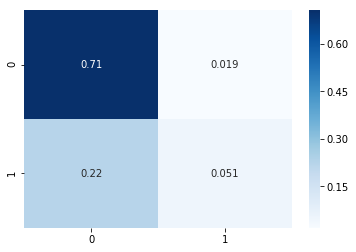

In [303]:
sns.heatmap(confusion_matrix(y_test,dtree_prediction) / len(y_test), cmap='Blues', annot=True)

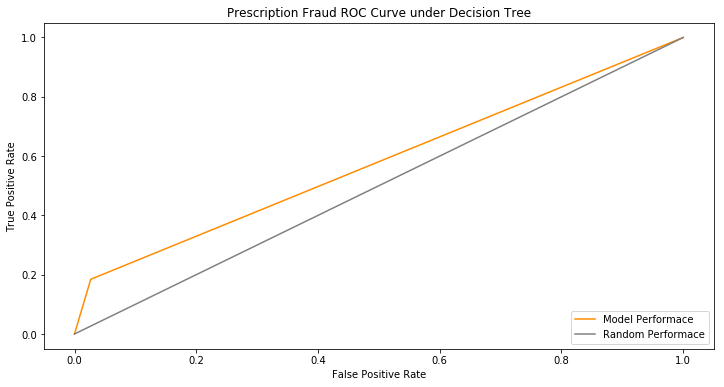

In [304]:
fpr, tpr, thresholds = roc_curve(y_test,dtree_prediction)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Prescription Fraud ROC Curve under Decision Tree')
plt.legend(loc="lower right")

In [305]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,dtree_prediction)

0.5789028607213519

In [306]:
import sys
!{sys.executable} -m pip install graphviz

In [307]:
import graphviz
dot_data=tree.export_graphviz(clf,out_file=None)
graph=graphviz.Source(dot_data)
graph.render("encoded_df")

'encoded_df.pdf'

### DECISION TREE USING SOME VARIABLES & NO LOG TRANSFORM

In [308]:
inputvar_a=encoded_df[['generic_name','ActiveIngredient','drug_name','infoYear',
                    'nppes_provider_state','specialty_description']]

In [309]:
X_train_a, X_test_a, y_train_a, y_test_a = cross_validation.train_test_split(inputvar_a, targetvar, test_size=0.3)

0.8033767614996011
             precision    recall  f1-score   support

          0       0.64      0.67      0.66      6284
          1       0.87      0.85      0.86     16282

avg / total       0.81      0.80      0.80     22566

[[ 4224  2060]
 [ 2377 13905]]


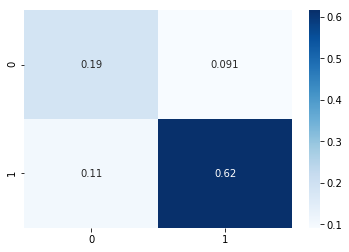

In [161]:
dtree_a = DecisionTreeClassifier()

dtree_a.fit(X_train_a,y_train_a)

dtree_prediction_a = dtree_a.predict(X_test_a)

print(accuracy_score(y_test_a,dtree_prediction_a))

print(classification_report(y_test_a,dtree_prediction_a))

print(confusion_matrix(y_test_a,dtree_prediction_a))

sns.heatmap(confusion_matrix(y_test_a,dtree_prediction_a) / len(y_test_a), cmap='Blues', annot=True)

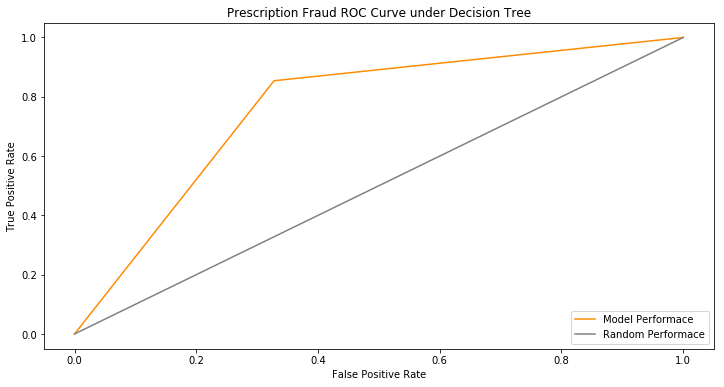

In [162]:
fpr, tpr, thresholds = roc_curve(y_test_a,dtree_prediction_a)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Prescription Fraud ROC Curve under Decision Tree')
plt.legend(loc="lower right")

### LOGISTIC REGRESSION USING ALL VARS AND NO LOG TRANSFORM ON NUMERIC - 73% ACCURACY on good but no predictions on bad

In [163]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train,y_train) #use same train-test split as in decision tree

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [164]:
LRpred = LRmodel.predict(X_test)

In [165]:
print(accuracy_score(y_test,LRpred))

0.7457679695116547


In [166]:
print(confusion_matrix(y_test,LRpred)) 

[[  798  5391]
 [  346 16031]]


In [167]:
print(classification_report(y_test,LRpred))

             precision    recall  f1-score   support

          0       0.70      0.13      0.22      6189
          1       0.75      0.98      0.85     16377

avg / total       0.73      0.75      0.68     22566



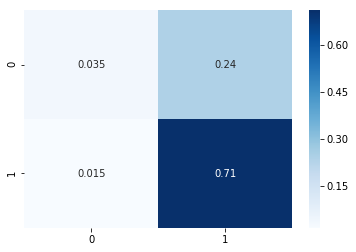

In [168]:
sns.heatmap(confusion_matrix(y_test,LRpred) / len(y_test), cmap='Blues', annot=True)

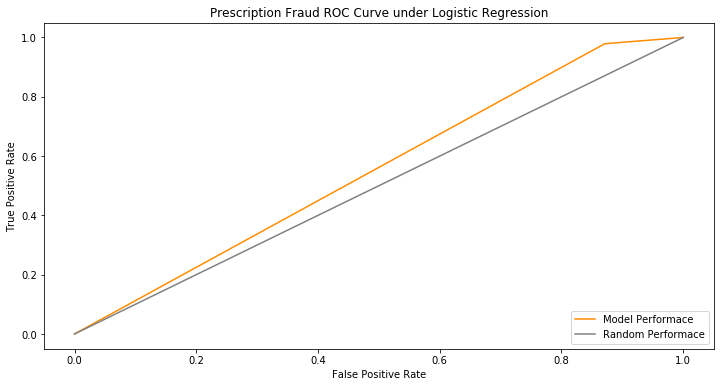

In [169]:
fpr, tpr, thresholds = roc_curve(y_test,LRpred)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Prescription Fraud ROC Curve under Logistic Regression')
plt.legend(loc="lower right")

In [170]:
roc_auc_score(y_test,LRpred)

0.5539056242970595

In [171]:
len(encoded_df)

75220

### LOGISTIC REGRESSION USING SOME VARS AND NO LOG TRANSFORM

In [172]:
inputvar_a=encoded_df[['generic_name','ActiveIngredient','drug_name','infoYear',
                    'nppes_provider_state','specialty_description']]

In [173]:
LRmodel_a = LogisticRegression()
LRmodel_a.fit(X_train_a,y_train_a)
LRpred_a = LRmodel_a.predict(X_test_a)

In [174]:
print(accuracy_score(y_test_a,LRpred_a))
print(confusion_matrix(y_test_a,LRpred_a)) 
print(classification_report(y_test_a,LRpred_a))

0.7213950190552159
[[    6  6278]
 [    9 16273]]
             precision    recall  f1-score   support

          0       0.40      0.00      0.00      6284
          1       0.72      1.00      0.84     16282

avg / total       0.63      0.72      0.61     22566



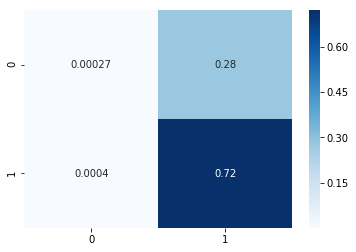

In [175]:
sns.heatmap(confusion_matrix(y_test_a,LRpred_a) / len(y_test_a), cmap='Blues', annot=True)

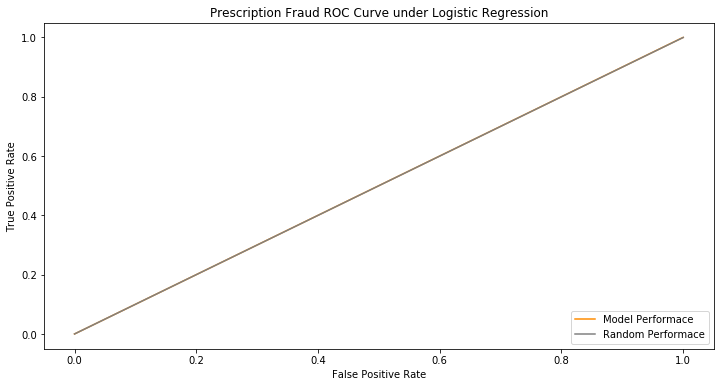

In [176]:
fpr, tpr, thresholds = roc_curve(y_test_a,LRpred_a)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Prescription Fraud ROC Curve under Logistic Regression')
plt.legend(loc="lower right")

In [177]:
roc_auc_score(y_test_a,LRpred_a)

0.5002010241048309

### LOGISTIC REGRESSION USING ALL VARS AND LOG TRANSFORMATION ON NUMERIC - 72% on good no predictions on bad

In [178]:
inputvar2=encoded_df.drop((['good']), axis=1)

In [179]:
inputvar2.head()

,Unnamed: 0,Unnamed: 0.1,npi,generic_name,ActiveIngredient,drug_name,infoYear,nppes_provider_city,nppes_provider_first_name,nppes_provider_last_org_name,nppes_provider_state,specialty_description,total_30_day_fill_count,total_claim_count,total_day_supply,total_drug_cost,flag1,flag2,flag
0,0,0,1003001868,0,-1,0,13,0,0,0,0,0,34.0,34,125,127.86,False,False,0
1,1,6,1003076159,1,-1,1,13,1,1,1,1,1,12.0,12,221,174.80,False,False,0
2,2,7,1003076159,2,-1,2,13,1,1,1,1,1,18.0,14,534,350.84,False,False,0
3,3,8,1003076159,3,-1,3,13,1,1,1,1,1,18.0,13,540,5442.04,False,False,0
4,4,9,1003076159,4,-1,4,13,1,1,1,1,1,12.4,12,157,61.51,False,False,0


In [180]:
#log transform the numeric variables
inputvar2[['total_30_day_fill_count','total_claim_count','total_day_supply',
            'total_drug_cost']]=np.log(inputvar2[['total_30_day_fill_count','total_claim_count',
                                                   'total_day_supply','total_drug_cost']])

In [181]:
inputvar2.head() #check log transform occurred

,Unnamed: 0,Unnamed: 0.1,npi,generic_name,ActiveIngredient,drug_name,infoYear,nppes_provider_city,nppes_provider_first_name,nppes_provider_last_org_name,nppes_provider_state,specialty_description,total_30_day_fill_count,total_claim_count,total_day_supply,total_drug_cost,flag1,flag2,flag
0,0,0,1003001868,0,-1,0,13,0,0,0,0,0,3.526361,3.526361,4.828314,4.850936,False,False,0
1,1,6,1003076159,1,-1,1,13,1,1,1,1,1,2.484907,2.484907,5.398163,5.163642,False,False,0
2,2,7,1003076159,2,-1,2,13,1,1,1,1,1,2.890372,2.639057,6.280396,5.860330,False,False,0
3,3,8,1003076159,3,-1,3,13,1,1,1,1,1,2.890372,2.564949,6.291569,8.601909,False,False,0
4,4,9,1003076159,4,-1,4,13,1,1,1,1,1,2.517696,2.484907,5.056246,4.119200,False,False,0


In [182]:
X_train2, X_test2, y_train2, y_test2 = cross_validation.train_test_split(inputvar2, targetvar, test_size=0.3)

In [183]:
LRmodel2 = LogisticRegression()
LRmodel2.fit(X_train2,y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [184]:
LRpred2 = LRmodel2.predict(X_test2)

In [185]:
print(accuracy_score(y_test2,LRpred2))

0.724009571922361


In [186]:
print(confusion_matrix(y_test2,LRpred2))

[[    0  6228]
 [    0 16338]]


In [187]:
print(classification_report(y_test2,LRpred2))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      6228
          1       0.72      1.00      0.84     16338

avg / total       0.52      0.72      0.61     22566



/Users/ed/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


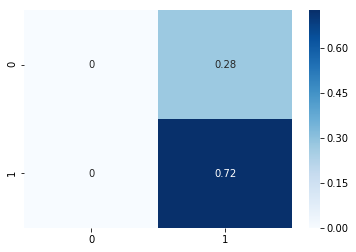

In [188]:
sns.heatmap(confusion_matrix(y_test2,LRpred2) / len(y_test2), cmap='Blues', annot=True)

attempts to visualize

In [189]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz


In [190]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
export_graphviz

#graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

NameError: name 'dtree' is not defined

In [191]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

NameError: name 'estimator' is not defined

In [192]:
from subprocess import call
call(['dot', '-Tpng', 'dot_data', '-o', 'tree.png', '-Gdpi=600'])

2

### Clustering

In [193]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

# normality test
stat, p = shapiro(inputvar2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.237, p=0.000
Sample does not look Gaussian (reject H0)


/Users/ed/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [336]:
inputvar2numcols=inputvar2[['total_claim_count','total_day_supply','total_drug_cost']]

In [342]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(inputvar2numcols)
y_kmeans = kmeans.predict(inputvar2numcols)

In [343]:
#labels = kmeans.predict(superframe.generic_name)
# Centroid values
C = kmeans.cluster_centers_

In [344]:
print(C) # From sci-kit learn

[[2.89445753 6.25892796 7.89998846]
 [5.96003194 9.56608438 9.38493778]
 [3.93803877 7.47167321 9.66803703]
 [2.72340972 5.77308364 5.09391048]
 [3.43757102 7.03999364 6.12091321]
 [4.58991146 8.26478323 7.34904939]]


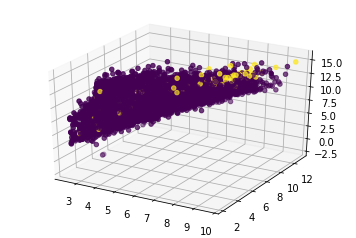

In [345]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(inputvar2[['total_claim_count']],inputvar2['total_day_supply'],inputvar2['total_drug_cost'], c=inputvar2['flag']);

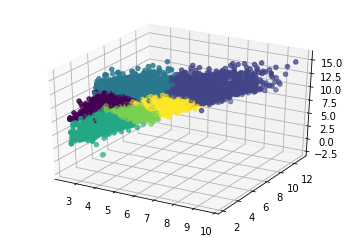

In [346]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(inputvar2['total_claim_count'],inputvar2['total_day_supply'],inputvar2['total_drug_cost'], c=y_kmeans);

In [199]:
from scipy.spatial.distance import squareform,pdist                                                              
#similarities = squareform(pdist(inputvar2numcols,'euclidean'))

KeyboardInterrupt: 

In [ ]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(inputvar2numcols)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');